### LightGBM Regression

### Car price prediction

**Regression models**

1. Linear Regression
2. Random Forest Regression
3. Gradient Boosting regression
4. LightGBM
5. XGboost
6. CatBoost

In [1]:
#Importing necessary libraries and understanding the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('./car data.csv')

### **Reading and understanding the dataset**

In [3]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Data Preprocessing

In [8]:
df['Age']=2022-df['Year']
df.drop('Year', axis=1, inplace=True)

In [9]:
df.rename(columns={'Owner':'Past_Owner'}, inplace=True)

### EDA

In [10]:
#Univariate Analysis
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Past_Owner', 'Age'],
      dtype='object')

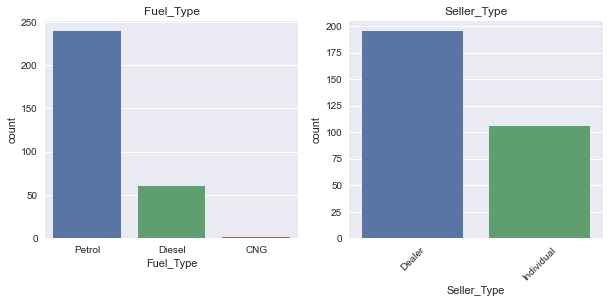

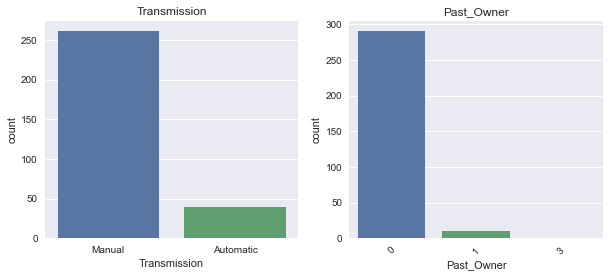

In [11]:
categorical_columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owner']
i=0
while i<4:
    fig=plt.figure(figsize=[10,4])
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    
    ax1.title.set_text(categorical_columns[i])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical_columns[i], data=df)
    i+=1
    
    ax2.title.set_text(categorical_columns[i])
    plt.subplot(1,2,2)
    sns.countplot(x=categorical_columns[i], data=df)
    i+=1
    plt.xticks(rotation = 45)
    plt.show()

In [12]:
numerical_columns = ['Selling_Price','Present_Price','Kms_Driven','Age']

In [13]:
def boxplot_numeriacl():
    i=0
    while i < 4:
        fig = plt.figure(figsize=[13,3])
        plt.subplot(1,2,1)
        sns.boxplot(x=numerical_columns[i], data=df)
        i += 1
        
        plt.subplot(1,2,2)
        sns.boxplot(x=numerical_columns[i], data=df)
        i += 1
        
        plt.show()

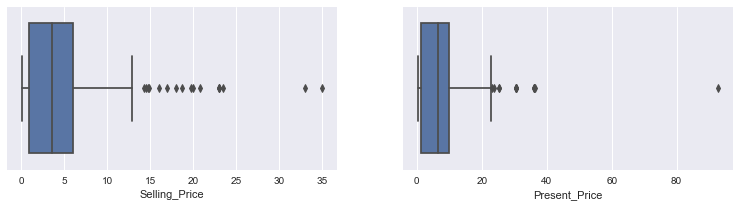

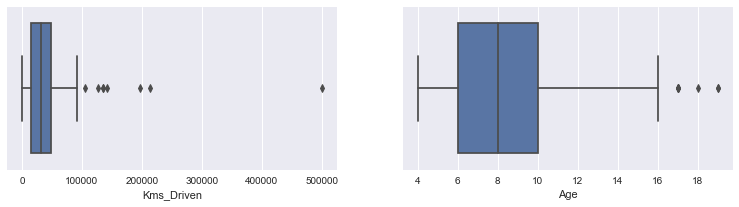

In [14]:
boxplot_numeriacl()

In [15]:
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [16]:
# Deal with outliers
df['Present_Price'] = np.where(df['Present_Price'] > 80, np.mean(df['Present_Price']), df['Present_Price'])

In [17]:
df[df['Selling_Price']>df['Selling_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
63,fortuner,23.5,35.960000,47000,Diesel,Dealer,Automatic,0,7
64,fortuner,33.0,36.230000,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,7.628472,78000,Diesel,Dealer,Manual,0,12


In [18]:
df['Selling_Price'] = np.where(df['Selling_Price'] > 30, np.mean(df['Selling_Price']), df['Selling_Price'])

In [19]:
df[df['Kms_Driven']>df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,17
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,12
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,14


In [20]:
df['Kms_Driven'] = np.where(df['Kms_Driven'] > 400000, np.mean(df['Kms_Driven']), df['Kms_Driven'])

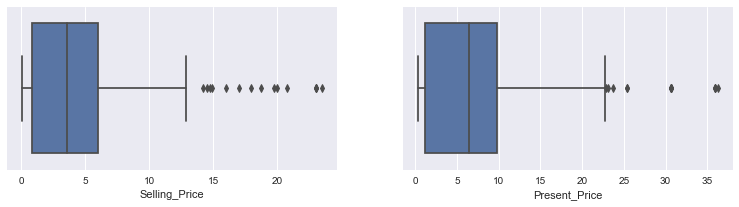

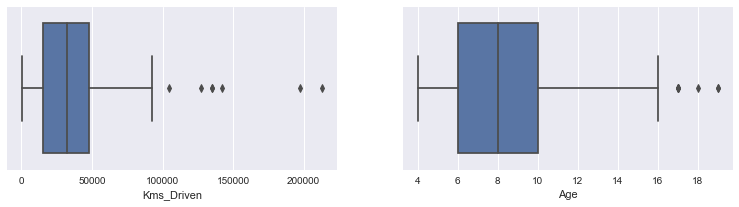

In [21]:
boxplot_numeriacl()

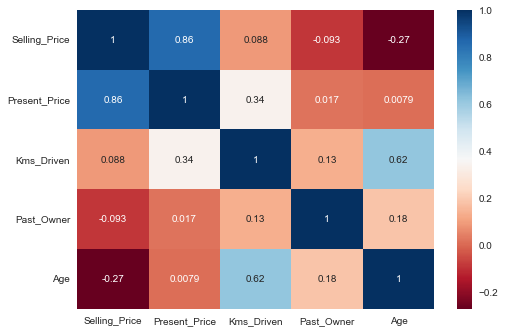

In [22]:
#Bivariate and Multi-Variate Analysis
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

In [23]:
df.corr()['Selling_Price']

Selling_Price    1.000000
Present_Price    0.856318
Kms_Driven       0.088481
Past_Owner      -0.092669
Age             -0.271774
Name: Selling_Price, dtype: float64

# Data Preparation
**Creating dummie variables for categorical features**

In [24]:
df.drop(labels='Car_Name', axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owner,Age
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,8


In [25]:
df=pd.get_dummies(data=df, drop_first=True)

In [26]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Past_Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,8,0,1,0,1
1,4.75,9.54,43000.0,0,9,1,0,0,1
2,7.25,9.85,6900.0,0,5,0,1,0,1
3,2.85,4.15,5200.0,0,11,0,1,0,1
4,4.60,6.87,42450.0,0,8,1,0,0,1


# X,y

**Splitting dataset int train and test subsets**

In [27]:
X=df.drop('Selling_Price', axis=1)
y=df['Selling_Price']

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


### **Creating models (Evaluation)**

**Regression models**

1. Linear Regression
2. Random Forest Regression
3. Gradient Boosting regression

In [30]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [31]:
CV=[]
R2_train=[]
R2_test=[]

def car_pred_model(model):
    model.fit(X_train, y_train)
    
    #Calculating R2 score of train subset
    y_pred_train=model.predict(X_train)
    R2_train_model=r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    #Calculating R2 score of test subset
    y_pred_test=model.predict(X_test)
    R2_test_model=r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    #R2 mean of train subset using Cross Validation
    cross_val=cross_val_score(model, X_train, y_train, cv=5)
    cv_mean=cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    print("Train R2 score: ", round(R2_train_model,2))
    print("Test R2 score: ", round(R2_test_model,2))
    print("Train CV scores: ",cross_val)
    print("Train CV mean: ", round(cv_mean,2))
    
    #Plotting graphs
    fig, ax= plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    #Y_test VS. Y_train scatter plot
    ax[1].set_title('y_test VS. y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [40]:
R2_train=[]
R2_test=[]

def car_pred_model_wo_cv(model):
    #model.fit(X_train, y_train)
    
    #Calculating R2 score of train subset
    y_pred_train=model.predict(X_train)
    R2_train_model=r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    #Calculating R2 score of test subset
    y_pred_test=model.predict(X_test)
    R2_test_model=r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model,2))
      
    print("Train R2 score: ", round(R2_train_model,2))
    print("Test R2 score: ", round(R2_test_model,2))
    
    #Plotting graphs
    fig, ax= plt.subplots(1,2,figsize=(10,4))
    ax[0].set_title("Residual Plot of Train samples")
    sns.distplot((y_train-y_pred_train), hist=False, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    #Y_test VS. Y_train scatter plot
    ax[1].set_title('y_test VS. y_pred_test')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### Standard Linear Regression

Train R2 score:  0.82
Test R2 score:  0.89
Train CV scores:  [0.89185563 0.8540795  0.81821094 0.8405097  0.00508645]
Train CV mean:  0.68


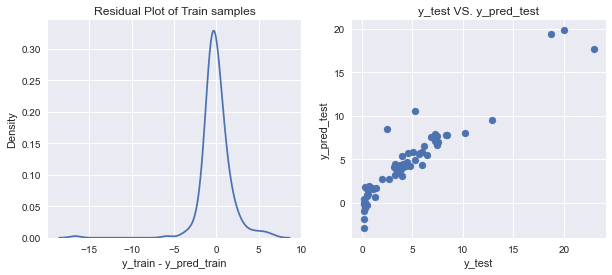

In [50]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
car_pred_model(lr)

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,2))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2 score:  0.88
Test R2 score:  0.76
Train CV scores:  [0.87911619 0.88403005 0.7684819  0.93480445 0.38161989]
Train CV mean:  0.77


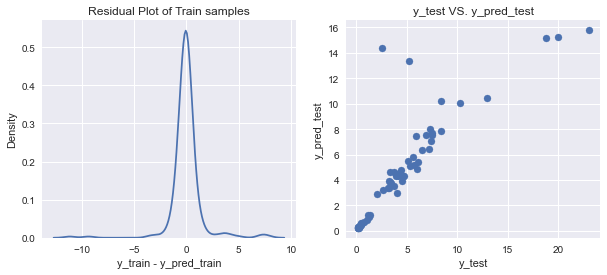

In [52]:
car_pred_model(rf_rs)

In [53]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=6, max_features='auto', min_samples_leaf=7,
                      min_samples_split=4, n_estimators=800)


### Gradient Boosting

In [54]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

#Rate at which correcting is made
learning_rate=[0.001, 0.01, 0.1, 0.2]
#Number of trees in Gradient Boosting
n_estimators=list(range(500,1000,100))
#Maxiumum number of levels in a tree
max_depth=list(range(4,9,4))
#Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
#Minimum number of samples required to be at a leaf node
min_samples_leaf=[1,2,5,7]
#Number of features to be consdered at each split
max_features=['auto', 'sqrt']

#Hyperparameters dict
param_grid={"learning_rate": learning_rate, 
            "n_estimators":n_estimators, 
            "max_depth": max_depth, 
            "min_samples_split":min_samples_split, 
            "min_samples_leaf": min_samples_leaf, 
            "max_features": max_features}

gb_rs=RandomizedSearchCV(estimator=gb, param_distributions=param_grid)

Train R2 score:  0.96
Test R2 score:  0.96
Train CV scores:  [0.9004812  0.7480604  0.81224949 0.94950835 0.34803512]
Train CV mean:  0.75


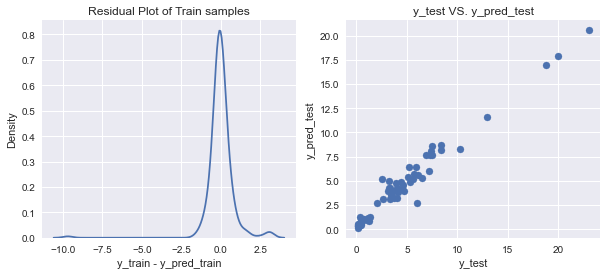

In [55]:
car_pred_model(gb_rs)

4. LightGBM
5. XGboost
6. CatBoost

### LightGBM

In [43]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV

In [44]:
lgbm_reg = lgb.LGBMRegressor()

In [45]:
lgbm_reg.fit(X_train,y_train)

LGBMRegressor()

In [46]:
y_pred = lgbm_reg.predict(X_test)

In [47]:
lgbm_reg.feature_importances_

array([404, 256,   0, 146,  19,   6,   2,  14])

In [48]:
lgbm_reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Train R2 score:  0.93
Test R2 score:  0.91
Train CV scores:  [0.90991699 0.78449543 0.86726255 0.94431969 0.5249472 ]
Train CV mean:  0.81


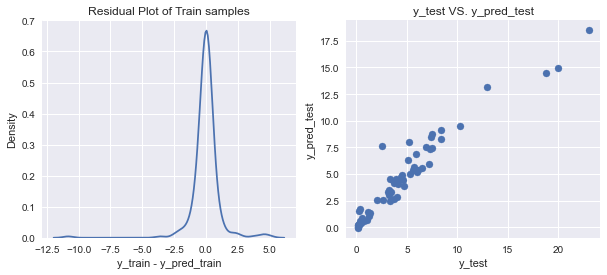

In [49]:
car_pred_model(lgbm_reg)

In [83]:
param_grid = {
    'learning_rate' : [0.01, 0.03],
    'n_estimators' : [100, 500],
    'max_depth' : [4,8],
    'min_child_samples' : [10,20],
    'min_child_weight' : [0.01,0.05],
    }

In [84]:
lgb_estimator = lgb.LGBMRegressor(boosting_type='gbdt',  
                                  objective='regression', 
                                  num_boost_round=2000, 
                                  learning_rate=0.01)

In [85]:
gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=5)

In [86]:
lgb_model = gsearch.fit(X_train,y_train)

[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] num

In [87]:
y_pred = lgb_model.predict(X_test)

Train R2 score:  0.97
Test R2 score:  0.92


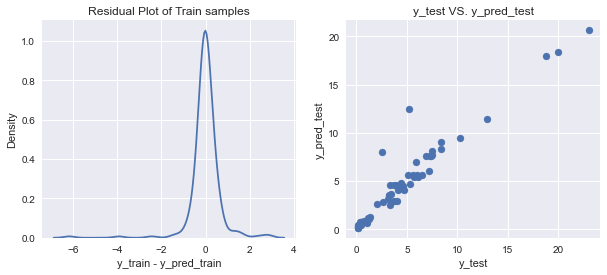

In [88]:
car_pred_model_wo_cv(lgb_model)

In [ ]:
lgb_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__boosting_type': 'gbdt',
 'estimator__class_weight': None,
 'estimator__colsample_bytree': 1.0,
 'estimator__importance_type': 'split',
 'estimator__learning_rate': 0.01,
 'estimator__max_depth': -1,
 'estimator__min_child_samples': 20,
 'estimator__min_child_weight': 0.001,
 'estimator__min_split_gain': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__num_leaves': 31,
 'estimator__objective': 'regression',
 'estimator__random_state': None,
 'estimator__reg_alpha': 0.0,
 'estimator__reg_lambda': 0.0,
 'estimator__silent': 'warn',
 'estimator__subsample': 1.0,
 'estimator__subsample_for_bin': 200000,
 'estimator__subsample_freq': 0,
 'estimator__num_boost_round': 2000,
 'estimator__metric': 'accuracy',
 'estimator': LGBMRegressor(learning_rate=0.01, metric='accuracy', num_boost_round=2000,
               objective='regression'),
 'n_jobs': None,
 'param_grid': {'learning_rate': [0.001,
   0.003,
   0.005,
   0.01,
  

## XGboost

In [32]:
import xgboost as xgb

In [33]:
xgb_reg = xgb.XGBRegressor()

In [34]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [35]:
xgb_reg.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [36]:
# grid search for parameters tuning
param_search = {
 'max_depth': [4,6,8],
 'min_child_weight': [1,3,5],
 'learning_rate': [0.01, 0.03, 0.1, 0.3, 0.35],
 'subsample': [0.7, 0.8, 0.9, 1.0]
}
estimator = xgb.XGBRegressor(n_estimators=300,
                              gamma=0, 
                              colsample_bytree=0.8, 
                              objective= 'reg:squarederror', 
                              nthread=4, 
                              seed=2,
                              )
serach = GridSearchCV(estimator, 
                         param_grid=param_search, 
                         scoring='r2', 
                         n_jobs=-1, 
                         cv=5)

In [37]:
xgb_reg = serach.fit(X_train, y_train)

Train R2 score:  0.93
Test R2 score:  0.91


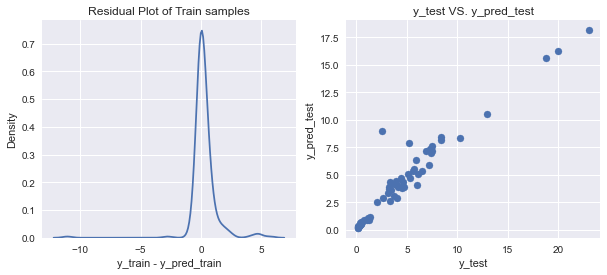

In [41]:
car_pred_model_wo_cv(xgb_reg)

## CatBoost

In [ ]:
import catboost as cb

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
cat_reg = cb.CatBoostRegressor(loss_function='RMSE',task_type='GPU',random_state=10, verbose=False)

In [ ]:
cat_reg.fit(X_train, y_train)

Learning rate set to 0.033506
0:	learn: 5.0552208	total: 19.7ms	remaining: 19.6s
1:	learn: 4.9431820	total: 29.6ms	remaining: 14.8s
2:	learn: 4.8463132	total: 41.1ms	remaining: 13.7s
3:	learn: 4.7438902	total: 53.7ms	remaining: 13.4s
4:	learn: 4.6444753	total: 65.4ms	remaining: 13s
5:	learn: 4.5568891	total: 76.4ms	remaining: 12.7s
6:	learn: 4.4550252	total: 87.5ms	remaining: 12.4s
7:	learn: 4.3641085	total: 113ms	remaining: 14s
8:	learn: 4.2773886	total: 126ms	remaining: 13.9s
9:	learn: 4.1868387	total: 139ms	remaining: 13.7s
10:	learn: 4.1084196	total: 154ms	remaining: 13.8s
11:	learn: 4.0308483	total: 166ms	remaining: 13.7s
12:	learn: 3.9502138	total: 177ms	remaining: 13.4s
13:	learn: 3.8668341	total: 189ms	remaining: 13.3s
14:	learn: 3.7912759	total: 201ms	remaining: 13.2s
15:	learn: 3.7128385	total: 214ms	remaining: 13.2s
16:	learn: 3.6479791	total: 226ms	remaining: 13.1s
17:	learn: 3.5808352	total: 238ms	remaining: 13s
18:	learn: 3.5104151	total: 250ms	remaining: 12.9s
19:	learn:

In [ ]:
y_pred = cat_reg.predict(X_test)

Learning rate set to 0.032541
0:	learn: 5.2790453	total: 12.8ms	remaining: 12.8s
1:	learn: 5.1633752	total: 22.7ms	remaining: 11.3s
2:	learn: 5.0536857	total: 34.3ms	remaining: 11.4s
3:	learn: 4.9413751	total: 46.8ms	remaining: 11.7s
4:	learn: 4.8363850	total: 56.4ms	remaining: 11.2s
5:	learn: 4.7355961	total: 68.2ms	remaining: 11.3s
6:	learn: 4.6352533	total: 80.4ms	remaining: 11.4s
7:	learn: 4.5411535	total: 92.4ms	remaining: 11.5s
8:	learn: 4.4549939	total: 104ms	remaining: 11.4s
9:	learn: 4.3725355	total: 113ms	remaining: 11.2s
10:	learn: 4.2935102	total: 122ms	remaining: 11s
11:	learn: 4.2073413	total: 134ms	remaining: 11.1s
12:	learn: 4.1197020	total: 146ms	remaining: 11.1s
13:	learn: 4.0365403	total: 157ms	remaining: 11.1s
14:	learn: 3.9601243	total: 170ms	remaining: 11.1s
15:	learn: 3.8824229	total: 182ms	remaining: 11.2s
16:	learn: 3.8109882	total: 196ms	remaining: 11.3s
17:	learn: 3.7429085	total: 207ms	remaining: 11.3s
18:	learn: 3.6719931	total: 219ms	remaining: 11.3s
19:	l

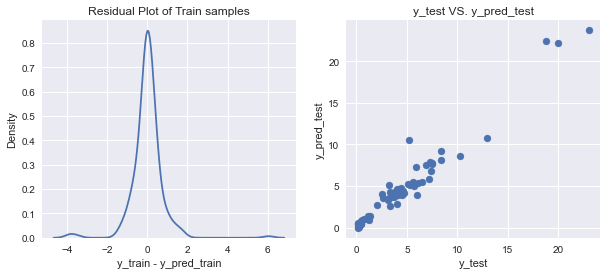

In [ ]:
car_pred_model(cat_reg)

In [ ]:
cat_reg = cb.CatBoostRegressor(task_type='GPU', 
                               loss_function='RMSE', 
                               random_state=10,
                               )

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.01, 0.01, 0.03],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
cat_reg.grid_search(grid, train_dataset)

0:	learn: 7.0901318	test: 5.5215080	best: 5.5215080 (0)	total: 9.42ms	remaining: 932ms
1:	learn: 6.9087955	test: 5.3725774	best: 5.3725774 (1)	total: 18.2ms	remaining: 894ms
2:	learn: 6.7336140	test: 5.2298823	best: 5.2298823 (2)	total: 27.4ms	remaining: 887ms
3:	learn: 6.5921384	test: 5.1016295	best: 5.1016295 (3)	total: 35.8ms	remaining: 859ms
4:	learn: 6.4563593	test: 4.9851171	best: 4.9851171 (4)	total: 43.9ms	remaining: 834ms
5:	learn: 6.3093348	test: 4.8681128	best: 4.8681128 (5)	total: 52ms	remaining: 814ms
6:	learn: 6.1550186	test: 4.7392306	best: 4.7392306 (6)	total: 60.3ms	remaining: 801ms
7:	learn: 6.0040585	test: 4.6212688	best: 4.6212688 (7)	total: 68.7ms	remaining: 790ms
8:	learn: 5.8829530	test: 4.5148452	best: 4.5148452 (8)	total: 76.8ms	remaining: 777ms
9:	learn: 5.7568102	test: 4.4169033	best: 4.4169033 (9)	total: 84.9ms	remaining: 764ms
10:	learn: 5.6204160	test: 4.3074910	best: 4.3074910 (10)	total: 92.9ms	remaining: 752ms
11:	learn: 5.4873354	test: 4.2066930	best: 

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

0:	learn: 4.9600624	total: 3.92ms	remaining: 781ms
1:	learn: 4.5570964	total: 7.52ms	remaining: 744ms
2:	learn: 4.2268396	total: 10.1ms	remaining: 663ms
3:	learn: 3.8860451	total: 13.8ms	remaining: 676ms
4:	learn: 3.5621150	total: 17.1ms	remaining: 668ms
5:	learn: 3.2931091	total: 20.1ms	remaining: 651ms
6:	learn: 3.0202427	total: 23.6ms	remaining: 649ms
7:	learn: 2.7655952	total: 27ms	remaining: 649ms
8:	learn: 2.5514029	total: 30.4ms	remaining: 645ms
9:	learn: 2.3447997	total: 34.1ms	remaining: 647ms
10:	learn: 2.1697606	total: 37.5ms	remaining: 644ms
11:	learn: 2.0066193	total: 41ms	remaining: 642ms
12:	learn: 1.8459591	total: 44.3ms	remaining: 637ms
13:	learn: 1.7033241	total: 48.1ms	remaining: 640ms
14:	learn: 1.5759915	total: 51.8ms	remaining: 639ms
15:	learn: 1.4616408	total: 55.3ms	remaining: 636ms
16:	learn: 1.3641033	total: 58.8ms	remaining: 633ms
17:	learn: 1.2668616	total: 62.2ms	remaining: 629ms
18:	learn: 1.1833710	total: 65.7ms	remaining: 626ms
19:	learn: 1.1090392	total

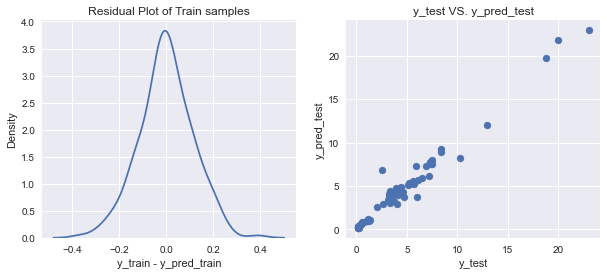

In [ ]:
car_pred_model(cat_reg)

In [ ]:
features = df.drop('Selling_Price',axis=1).columns

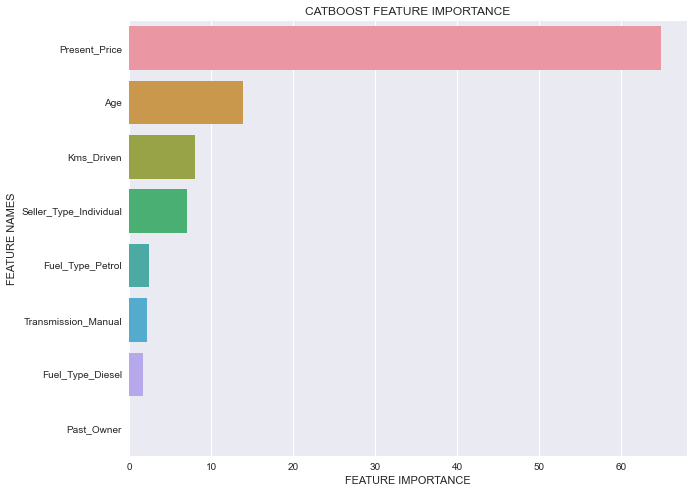

In [ ]:
plot_feature_importance(cat_reg.get_feature_importance(),features,'CATBOOST')

In [89]:
score = {
    'Linear' : 0.86,
    'Random Forest' : 0.88,
    'Gradient Boosting' : 0.96,
    'LightGBM' : 0.93,
    'XGBoost' : 0.96,
    'CatBoost': 0.97
}


In [93]:
score_df = pd.DataFrame.from_dict(score, orient='index', columns=['Score'])
score_df.head()

,Score
Linear,0.86
Random Forest,0.88
Gradient Boosting,0.96
LightGBM,0.93
XGBoost,0.96


Text(0, 0.5, 'R2 Score')

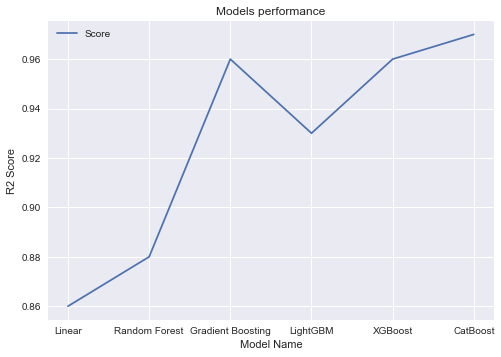

In [96]:
score_df.plot()
plt.title('Models performance')
plt.xlabel('Model Name')
plt.ylabel('R2 Score')

# Document all scores using a table and graph